<a href="https://colab.research.google.com/github/daka13/HowLLMsWork/blob/main/My_Text_image_compatibility_with_CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Map images and text to a vector space

This notebook uses the [OpenAI CLIP](https://openai.com/research/clip) model to create vector representations of text and images in the same space.

Process images with the [Pillow](https://realpython.com/image-processing-with-the-python-pillow-library) library.

In [ ]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")


config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
url = "https://i.pinimg.com/600x315/bf/bd/6f/bfbd6f305a456162849385ed16873b39.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=["a photo of cornell mascot", "a photo cornell student in a jersy"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities


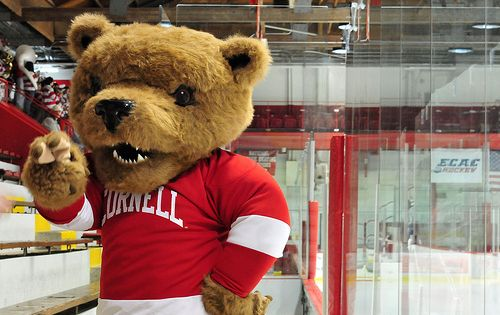

In [ ]:
image

In [ ]:
inputs.keys()

In [ ]:
from matplotlib import pyplot

In [ ]:
inputs["pixel_values"].shape

torch.Size([1, 3, 224, 224])

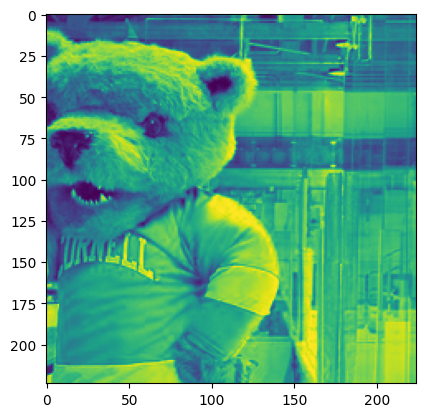

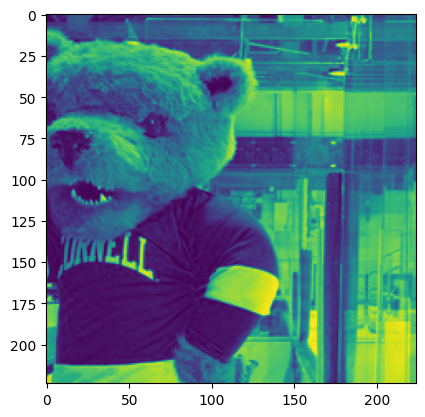

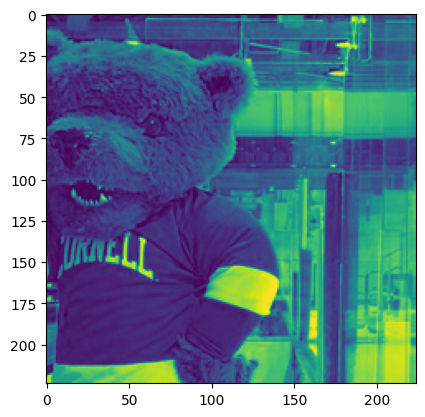

In [ ]:
pyplot.imshow(inputs["pixel_values"][0,0,:,:])
pyplot.show()
pyplot.imshow(inputs["pixel_values"][0,1,:,:])
pyplot.show()
pyplot.imshow(inputs["pixel_values"][0,2,:,:])

In [ ]:
outputs.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [ ]:
outputs.logits_per_text

tensor([[31.8418],
        [28.0041]], grad_fn=<MulBackward0>)

In [ ]:
outputs["text_embeds"].shape, outputs["image_embeds"].shape

(torch.Size([2, 768]), torch.Size([1, 768]))

In [ ]:
outputs["text_embeds"] @ outputs["image_embeds"].T

tensor([[0.3184],
        [0.2800]], grad_fn=<MmBackward0>)

In [ ]:
def load_image(filename, scaling=3):
  with Image.open(filename) as img:
    img.load()
    if scaling != 1.0:
      img = img.resize( (img.width // scaling, img.height // scaling) )
  return img

sparky = load_image("Baldwin.jpeg")
angora = load_image("Cornell_Mascot.jpeg")


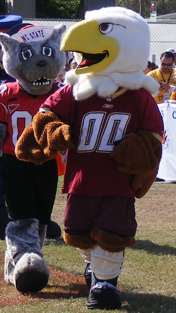

In [ ]:
sparky

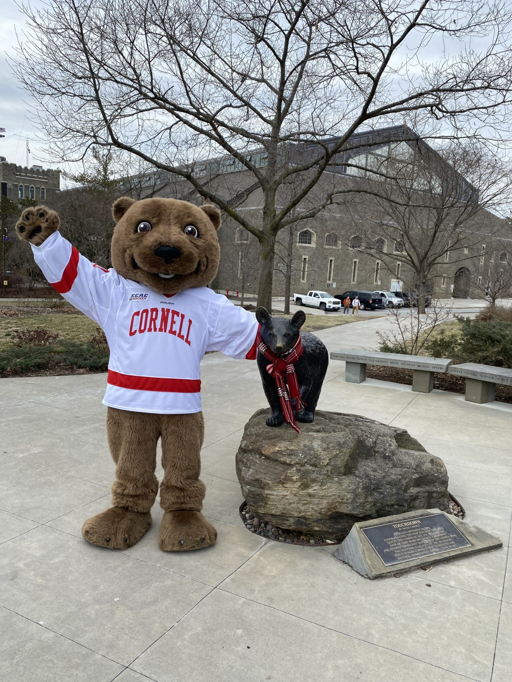

In [ ]:
angora

In [ ]:
sparky.size

(176, 313)

In [ ]:
inputs = processor(text=["Harvard mascot baldwin the eagle", "Cornell mascot standing beside the bear statue"], images=[sparky, angora], return_tensors="pt", padding=True)

outputs = model(**inputs)

In [ ]:
outputs["logits_per_image"]

tensor([[28.7760, 19.3307],
        [15.1381, 34.3077]], grad_fn=<TBackward0>)

In [ ]:
model

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 768)
      (position_embedding): Embedding(77, 768)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05,